In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
loan=pd.read_csv("loan_data_set.csv")

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan.corr()
loan.skew()
loan.median()
loan.mode()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,120.0,360.0,1.0,Semiurban,Y
1,LP001003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LP001005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LP001006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LP001008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,LP002979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,LP002983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,LP002984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.size

7982

In [6]:
loan.shape

(614, 13)

In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
x=loan["ApplicantIncome"].mode()
y=loan["ApplicantIncome"].median()

In [14]:
print(x)
print(y)


0    2500
dtype: int64
3812.5


In [15]:
import seaborn as sb

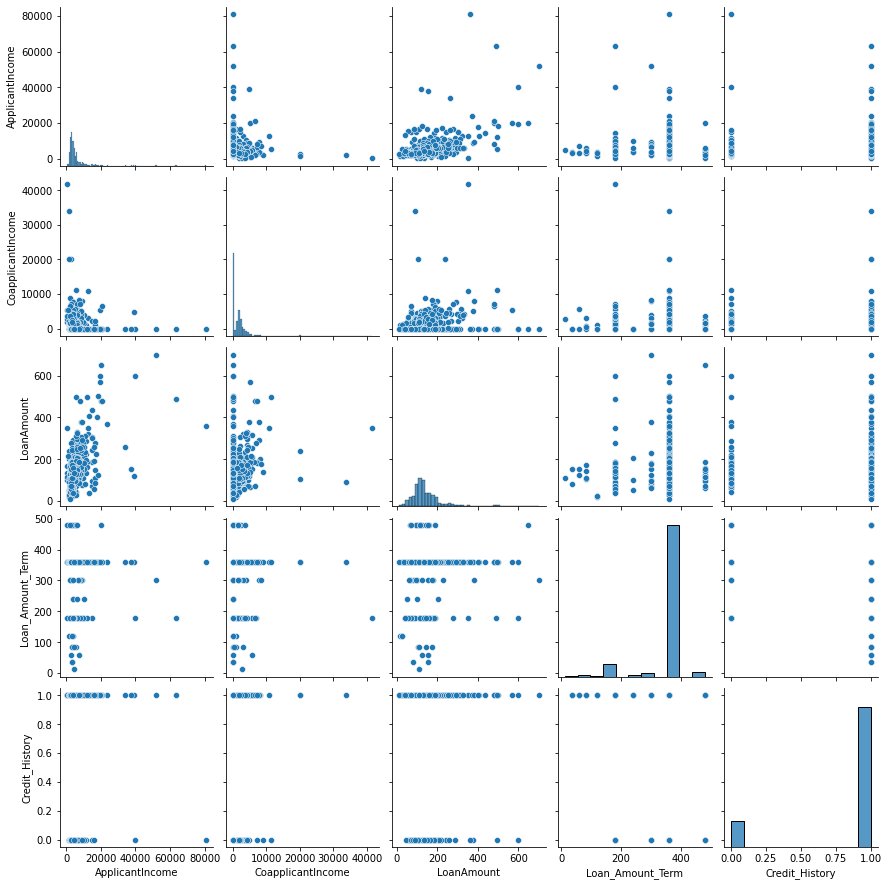

In [16]:
sb.pairplot(loan)

In [2]:
market=pd.read_csv("Super_store.csv")

In [13]:
market.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [8]:
market.groupby("Product Category")[["Profit","Sales"]].sum()


,Profit,Sales
Product Category,,
Furniture,177354.298188,3178623.74
Office Supplies,451990.216492,2258325.55
Technology,683097.884748,3514982.03


In [10]:
x=market.groupby("Product Category").agg({"Sales":["sum"],"Profit":["mean"]})
x

,Sales,Profit
,sum,mean
Product Category,,
Furniture,3178623.74,91.750801
Office Supplies,2258325.55,87.239957
Technology,3514982.03,295.457563


In [11]:
market.groupby(["Product Category","Product Sub-Category"])[["Profit","Sales"]].sum()

Profit       Sales
Product Category Product Sub-Category                                     
Furniture        Bookcases                        -7708.748564   507494.49
                 Chairs & Chairmats              165348.882760  1164584.16
                 Office Furnishings               92209.225867   444624.03
                 Tables                          -72495.061875  1061921.06
Office Supplies  Appliances                      121651.391380   456723.08
                 Binders and Binder Accessories  226572.523042   638582.09
                 Envelopes                        46133.223840   147921.03
                 Labels                           17775.320505    23449.90
                 Paper                            35361.621738   253600.31
                 Pens & Art Supplies               1195.902840   103251.59
                 Rubber Bands                     -2841.722459     8663.77
                 Scissors, Rulers and Trimmers    -1936.849120    40428.87
                 Storage & Organization            8078.804727   585704.91
Technology       Computer Peripherals             87917.842513   490840.53
                 Copiers and Fax                 129156.684030   661211.93
                 Office Machines                 168072.833340  1218656.59
                 Telephones and Communication    297950.524866  1144272.98

In [27]:
y=market.groupby("Product Sub-Category")["Sales"].sum()
y


Product Sub-Category
Appliances                         456723.08
Binders and Binder Accessories     638582.09
Bookcases                          507494.49
Chairs & Chairmats                1164584.16
Computer Peripherals               490840.53
Copiers and Fax                    661211.93
Envelopes                          147921.03
Labels                              23449.90
Office Furnishings                 444624.03
Office Machines                   1218656.59
Paper                              253600.31
Pens & Art Supplies                103251.59
Rubber Bands                         8663.77
Scissors, Rulers and Trimmers       40428.87
Storage & Organization             585704.91
Tables                            1061921.06
Telephones and Communication      1144272.98
Name: Sales, dtype: float64

In [28]:
market.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [31]:
exAir=market.groupby(['Ship Mode','Product Sub-Category'])['Sales'].sum()['Express Air'].sort_values(ascending=False)
market.groupby(['Ship Mode','Product Sub-Category'])['Sales'].sum()
regAir=market.groupby(['Ship Mode','Product Sub-Category'])['Sales'].sum()['Regular Air'].sort_values(ascending=False)
exAirSales=market.groupby(['Ship Mode','Product Sub-Category'])['Sales'].sum()['Express Air'].sort_values(ascending=False)
exAirSales
print("Second highest subcategory for Regular Air:'",regAirSales.index[1],"' is ranked #",list(exAirSales.index).index(regAirSales.index[1])+1,'in Exmarket')

NameError: name 'regAirSales' is not defined

In [12]:
df = pd.read_csv('companies.txt', encoding= 'ANSI', sep='\t')
df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [13]:
df["permalink"]=df["permalink"].apply(lambda x: x.lower())


In [15]:
df["permalink"].is_unique

True

In [19]:
df1 = pd.read_csv('rounds2.csv', encoding= 'ANSI')
df1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [20]:
n=df["permalink"].isin(df1["company_permalink"])
n

In [31]:
dfm= pd.merge(df,df1, left_on='permalink', right_on='company_permalink')
dfm
dfm

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57470,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
57471,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
57472,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
57473,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN


In [42]:
dfm["raised_amount_usd"].notna

In [50]:
l=dfm[dfm["raised_amount_usd"].notna()].groupby(dfm["funding_round_type"]).mean()
l


,raised_amount_usd
funding_round_type,
angel,1.077520e+06
convertible_note,1.136757e+06
debt_financing,1.934142e+07
equity_crowdfunding,4.857769e+05
grant,4.532950e+06
non_equity_assistance,6.053935e+05
post_ipo_debt,2.293336e+08
post_ipo_equity,7.758358e+07
private_equity,7.526126e+07


In [6]:
df=pd.read_csv("Salary_Data.csv")


In [7]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
reg=LinearRegression()

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
print("a1=",reg.coef_)

a1= [9202.23359825]


In [35]:
print("a0=",reg.intercept_)

a0= 26049.57771544336


In [36]:
y_pred=reg.predict(x_test)
x_test

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8
26,9.5
3,2.0
24,8.7


In [37]:
y_pred


array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [38]:
y_test

17     83088.0
21     98273.0
10     63218.0
19     93940.0
14     61111.0
20     91738.0
26    116969.0
3      43525.0
24    109431.0
Name: Salary, dtype: float64

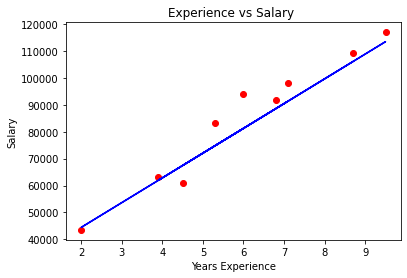

In [40]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("Experience vs Salary ")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [41]:
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

6256.134269625984

In [43]:
r2=r2_score(y_test,y_pred)
r2

0.9248580247217074

In [3]:
student=pd.read_csv("student.csv")

In [5]:
student

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [6]:
math=student["Math"]
reading=student["Reading"]
writing=student["Writing"]

In [7]:
from mpl_toolkits.mplot3d import Axes3D

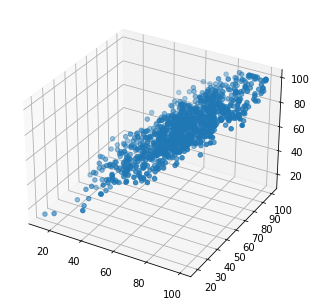

In [15]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,reading,writing)

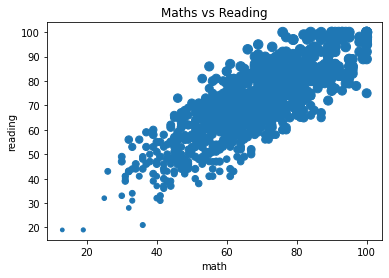

In [19]:
plt.scatter(math,reading,writing)
plt.xlabel("math")
plt.ylabel("reading")
plt.title("Maths vs Reading")
plt.show()

In [20]:
import numpy as np

In [27]:
x=np.array([math,reading]).T
y=np.array(writing)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
print("a1=",reg.coef_)
print("a0=",reg.intercept_)

a1= [0.10482163 0.90911677]
a0= -2.0924814918952706


In [33]:
y_pred=reg.predict(x_test)
x_test
y_pred
y_test

array([ 90,  67,  69,  59,  74,  65,  47,  59,  74,  81,  78,  75,  62,
        79,  70,  53,  41,  83,  71,  72,  46,  78, 100,  59,  79,  80,
        76,  74,  71,  65,  67,  93,  61,  80,  67,  71,  74,  81,  82,
        48,  85,  40,  53,  51,  63,  53,  46,  70,  55,  70,  81,  46,
        59,  66,  79,  88,  64,  85,  39,  67,  55,  72,  58,  83,  52,
        65,  69,  74,  75,  44, 100,  83,  39,  76,  78,  85,  90,  63,
        76,  89,  76,  81,  77,  68,  55,  89,  38,  60,  72,  74,  91,
        80,  47,  66,  58,  95,  47,  74,  79,  54,  71,  77,  52,  82,
        81,  65,  66,  43,  83,  69,  64,  62,  47,  78,  57,  87,  34,
        60,  73,  78,  69,  94,  79,  55,  95,  67,  63,  84,  83,  91,
        52,  65,  74,  78,  94,  79,  67,  74,  57,  14,  62,  74,  59,
        67,  77,  72,  56,  60,  71,  91,  92,  69,  80,  57,  48,  67,
        58,  70,  45,  66,  74,  46,  44,  48,  72,  65,  63,  83,  47,
        80,  68,  79,  82,  93,  74,  75,  78,  57,  70,  73,  4

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

4.545766200822718

In [37]:
r2=r2_score(y_test,y_pred)
r2

0.9000072030092053

In [47]:
x1=y_test-y_pred

In [45]:
z=[i for i in range(1,len(y_pred)+1)]

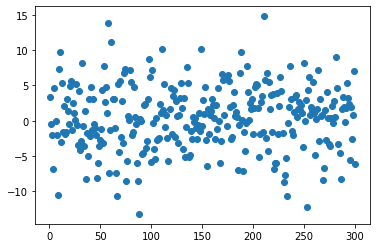

In [48]:
plt.scatter(z,x1)